# Mosquito Classifier

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time

from sklearn.metrics import accuracy_score, confusion_matrix

## Import featureset

In [2]:
featureset_path = "path/to/featureset/csv"

In [3]:
mosquito_featureset_original = pd.read_csv(featureset_path + "/mosquito_featureset_original.csv",sep=",")

## Data Preparation

### Split X and y from featureset

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = mosquito_featureset_original.drop(axis=1,columns=["Filename","Species","Sampling_Rate"])
y = mosquito_featureset_original["Species"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

### Scale X data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [9]:
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

### Make Confusion Matrix DataFrame from array

In [10]:
def make_confusion_matrix_df (y_test,y_pred):
    confusion_matrix_df = pd.DataFrame(data=confusion_matrix(y_test,y_pred),index=["Aedes Aegypti","Culex","Culiseta"],columns=["Aedes Aegypti","Culex","Culiseta"])
    confusion_matrix_df.index.rename("Actual",inplace=True)
    confusion_matrix_df.columns.rename("Predicted",inplace=True)
    return(confusion_matrix_df)

### Display Confusion Matrix

In [11]:
def display_confusion_matrix (confusion_matrix_df):
    v_min = confusion_matrix_df.min(axis=None).min()
    v_max = confusion_matrix_df.max(axis=None).max()
    off_diagonal_mask = np.eye(*confusion_matrix_df.shape, dtype=bool)
    
    fig = plt.figure()
    gs0 = matplotlib.gridspec.GridSpec(1,2, width_ratios=[20,2], hspace=0.05)
    gs00 = matplotlib.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[1], hspace=0)

    ax = fig.add_subplot(gs0[0])
    cax1 = fig.add_subplot(gs00[0])
    cax2 = fig.add_subplot(gs00[1])
    
    sns.heatmap(confusion_matrix_df, annot=True, mask=~off_diagonal_mask, cmap=sns.color_palette("crest_r", as_cmap=True), vmin=v_min, vmax=v_max, fmt="d", ax=ax, cbar_ax=cax2)
    sns.heatmap(confusion_matrix_df, annot=True, mask=off_diagonal_mask, cmap=sns.light_palette((0.9,0.3,0.1), input="rgb", as_cmap=True), vmin=v_min, vmax=v_max, ax=ax, cbar_ax=cax1, cbar_kws=dict(ticks=[]), fmt="d")

## K-nearest neighbour

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
start_time = time.time()
knn.fit(X_train_scaled, y_train)
estimated_time_knn = time.time() - start_time

In [15]:
y_pred_knn = knn.predict(X_test_scaled)

In [16]:
print("Accuracy KNN - {}. Trained in {:.3f} s".format(accuracy_score(y_pred=y_pred_knn, y_true=y_test), estimated_time_knn))

Accuracy KNN - 0.996031746031746. Trained in 0.003 s


/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:2: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  v_min = confusion_matrix_df.min(axis=None).min()
/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:3: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  v_max = confusion_matrix_df.max(axis=None).max()


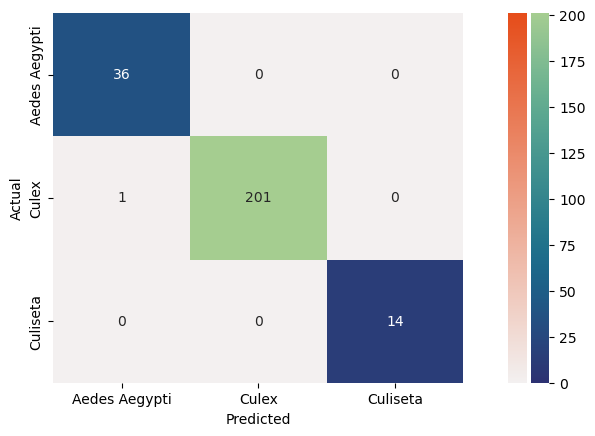

In [17]:
display_confusion_matrix(make_confusion_matrix_df(y_test,y_pred_knn))

## SVM

In [18]:
from sklearn.svm import SVC

In [19]:
svc = SVC()

In [20]:
start_time = time.time()
svc.fit(X_train_scaled, y_train)
estimated_time_svc = time.time() - start_time

In [21]:
y_pred_svc = svc.predict(X_test_scaled)

In [22]:
print("Accuracy SVC - {}. Trained in {:.3f} s".format(accuracy_score(y_pred=y_pred_svc, y_true=y_test), estimated_time_svc))

Accuracy SVC - 0.996031746031746. Trained in 0.050 s


/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:2: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  v_min = confusion_matrix_df.min(axis=None).min()
/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:3: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  v_max = confusion_matrix_df.max(axis=None).max()


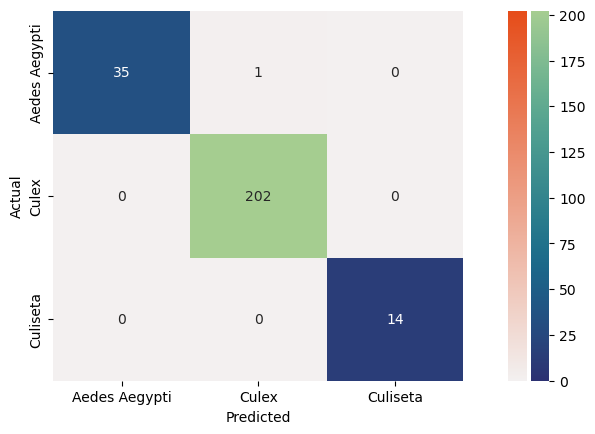

In [23]:
display_confusion_matrix(make_confusion_matrix_df(y_test,y_pred_svc))

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
random_forest = RandomForestClassifier(max_depth=3, random_state=777)

In [26]:
start_time = time.time()
random_forest.fit(X_train_scaled, y_train)
estimated_time_RF = time.time() - start_time

In [27]:
y_pred_RF = random_forest.predict(X_test_scaled)

In [28]:
print("Accuracy Random Forest - {}. Trained in {:.3f} s".format(accuracy_score(y_pred=y_pred_RF, y_true=y_test), estimated_time_RF))

Accuracy Random Forest - 0.9642857142857143. Trained in 0.297 s


/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:2: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  v_min = confusion_matrix_df.min(axis=None).min()
/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:3: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  v_max = confusion_matrix_df.max(axis=None).max()


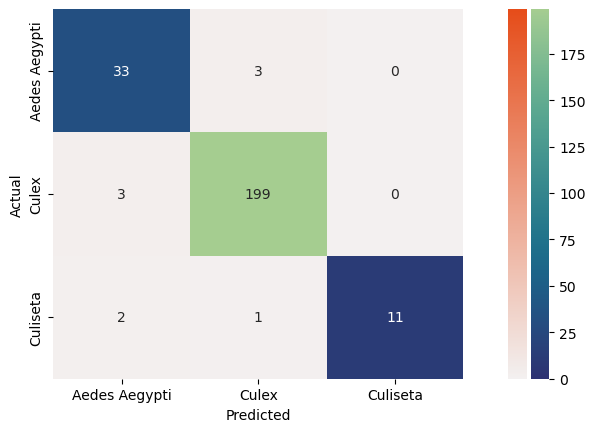

In [29]:
display_confusion_matrix(make_confusion_matrix_df(y_test,y_pred_RF))

## Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=777)

In [32]:
start_time = time.time()
gradient_boosting.fit(X_train_scaled, y_train)
estimated_time_GB = time.time() - start_time

In [33]:
y_pred_GB = gradient_boosting.predict(X_test_scaled)

In [34]:
print("Accuracy Gradient Boosting - {}. Trained in {:.3f} s".format(accuracy_score(y_pred=y_pred_GB, y_true=y_test), estimated_time_GB))

Accuracy Gradient Boosting - 0.9484126984126984. Trained in 1.471 s


/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:2: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  v_min = confusion_matrix_df.min(axis=None).min()
/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:3: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  v_max = confusion_matrix_df.max(axis=None).max()


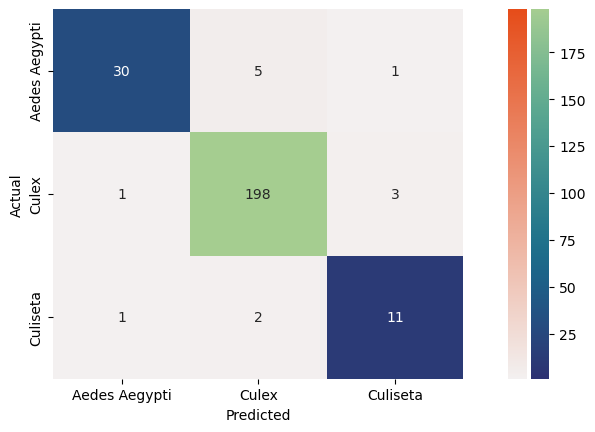

In [35]:
display_confusion_matrix(make_confusion_matrix_df(y_test,y_pred_GB))

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
naive_bayes = GaussianNB()

In [38]:
start_time = time.time()
naive_bayes.fit(X_train_scaled, y_train)
estimated_time_NB = time.time() - start_time

In [39]:
y_pred_NB = gradient_boosting.predict(X_test_scaled)

In [40]:
print("Accuracy Naive Bayes - {}. Trained in {:.3f} s".format(accuracy_score(y_pred=y_pred_NB, y_true=y_test), estimated_time_NB))

Accuracy Naive Bayes - 0.9484126984126984. Trained in 0.004 s


/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:2: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  v_min = confusion_matrix_df.min(axis=None).min()
/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:3: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  v_max = confusion_matrix_df.max(axis=None).max()


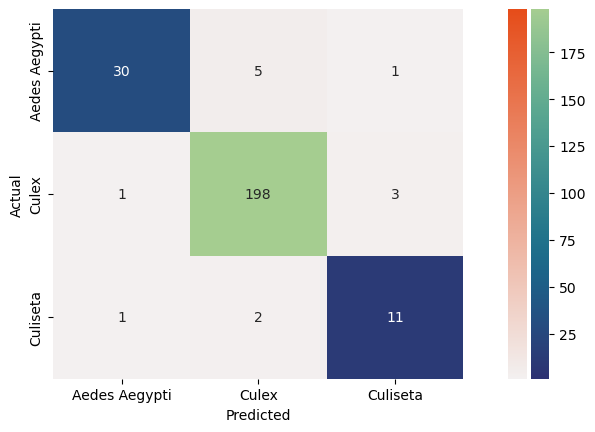

In [41]:
display_confusion_matrix(make_confusion_matrix_df(y_test,y_pred_NB))

## MLP Classifier

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,),activation="relu",random_state=777, max_iter=1000)

In [44]:
start_time = time.time()
mlp_classifier.fit(X_train_scaled, y_train)
estimated_time_MLP = time.time() - start_time

In [45]:
y_pred_MLP = mlp_classifier.predict(X_test_scaled)

In [46]:
print("Accuracy Multilayer Perceptron - {}. Trained in {:.3f} s".format(accuracy_score(y_pred=y_pred_MLP, y_true=y_test), estimated_time_MLP))

Accuracy Multilayer Perceptron - 0.996031746031746. Trained in 0.880 s


/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:2: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  v_min = confusion_matrix_df.min(axis=None).min()
/var/folders/6v/w771j2795bn73st3hx1zqz_h0000gp/T/ipykernel_2982/2120442936.py:3: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  v_max = confusion_matrix_df.max(axis=None).max()


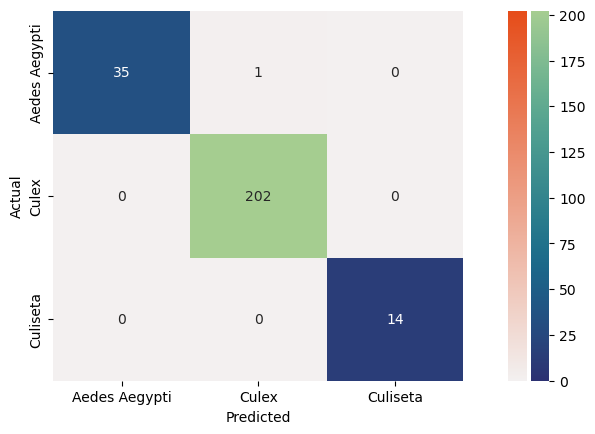

In [47]:
display_confusion_matrix(make_confusion_matrix_df(y_test,y_pred_MLP))